In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import reports
import utilities
import clean
import normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = utilities.create_spelling_dictionary(wordlist_dir, wordlists)

In [7]:
title = "LUH"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LUH/baseline

Average verified rate: 0.9445383705870094

Average of error rates: 0.058906913996627314

Total token count: 5815444



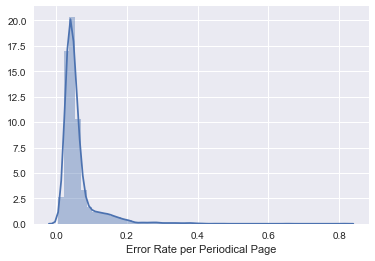

In [10]:
stats = reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = reports.get_errors_summary( stats )
reports.top_errors( errors_summary, 500 )

[('e', 15258),
 ('w', 12124),
 ('m', 9188),
 ('r', 8859),
 ('br', 8423),
 ('g', 7795),
 ('f', 7653),
 ('-', 6725),
 ('d', 6632),
 ("'", 3635),
 ('n', 3541),
 ('od', 3492),
 ('¥', 3324),
 ('gc', 3049),
 ('ñ', 2742),
 ('k', 2676),
 ('wm', 2500),
 ('con-', 2408),
 ('re-', 2095),
 ('t', 2061),
 ('in-', 1720),
 ('th', 1715),
 ('tion', 1704),
 (')', 1363),
 ('_', 1178),
 ("canvassers'", 1177),
 ('be-', 1173),
 ('ence', 1110),
 ('pg', 1107),
 ('%', 1004),
 ('com-', 951),
 ('de-', 932),
 ('bf', 907),
 ('ment', 899),
 ('mt', 889),
 ('confer-', 886),
 ('co', 876),
 ('ex-', 843),
 ('ference', 812),
 ('ck', 766),
 ('meet-', 735),
 ('hm', 728),
 ('en-', 714),
 ('mis-', 703),
 ('sab-', 641),
 ('ber', 625),
 ('u', 568),
 ('(', 526)]

## Check Special Characters

In [12]:
reports.tokens_with_special_characters(errors_summary)[:50]

[('¥', 3324),
 ('ñ', 2742),
 (')', 1363),
 ('_', 1178),
 ('%', 1004),
 ('(', 526),
 ('ña', 489),
 ('*', 426),
 ('ñthe', 379),
 ('*two', 366),
 ('ññ', 247),
 ('(b)', 242),
 ('(a)', 241),
 ('ñselected', 233),
 ('__', 222),
 (']', 210),
 ('ñmrs', 182),
 ('ñwe', 166),
 ('(c)', 159),
 ('(del)', 145),
 ('/', 138),
 ('ñto', 138),
 ('*j', 122),
 ('ñi', 118),
 ('(del', 108),
 ('*c', 94),
 ('ñat', 88),
 ('___', 82),
 ('*e', 81),
 ('*a', 80),
 ('(the', 78),
 ('(d)', 78),
 ('*mrs', 73),
 ('ñtwo', 72),
 ('ñone', 71),
 ('*h', 68),
 ('ñan', 63),
 ('`', 63),
 ('*w', 63),
 ('ñby', 61),
 ('*f', 56),
 ('+', 55),
 ('ñvol', 55),
 ('ã', 54),
 ('¥the', 53),
 ('(eng', 53),
 ('ñin', 52),
 ('ñfarm', 50),
 ('ñvolume', 48),
 ('ñfor', 46)]

## Correction 1 -- Normalize Special Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = cycle
cycle = "correction1"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LUH/correction1

Average verified rate: 0.9497736576334066

Average of error rates: 0.05332276559865093

Total token count: 5807132



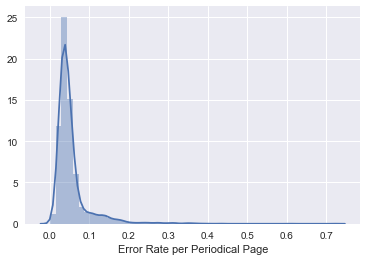

In [14]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('e', 15492),
 ('w', 12244),
 ('m', 9242),
 ('r', 8951),
 ('br', 8450),
 ('g', 7869),
 ('f', 7789),
 ('-', 6920),
 ('d', 6764),
 ("'", 3734),
 ('n', 3573),
 ('od', 3516),
 ('gc', 3058),
 ('k', 2713),
 ('wm', 2525),
 ('con-', 2414),
 ('t', 2121),
 ('re-', 2100),
 ('in-', 1725),
 ('th', 1721),
 ('tion', 1711),
 ("canvassers'", 1177),
 ('be-', 1173),
 ('pg', 1115),
 ('ence', 1112),
 ('com-', 952),
 ('de-', 933),
 ('co', 915),
 ('bf', 910),
 ('ment', 901),
 ('mt', 893),
 ('confer-', 886),
 ('ex-', 845),
 ('ference', 813),
 ('ck', 766),
 ('meet-', 735),
 ('hm', 731),
 ('en-', 714),
 ('mis-', 703),
 ('sab-', 642),
 ('ber', 625),
 ('u', 578),
 ('pro-', 498),
 ('peo-', 478),
 ('ad-', 476),
 ('ords', 475),
 ('ple', 474),
 ("sec'y-treas", 472),
 ('ers', 461),
 ('pre-', 459)]

## Correction 2 -- Fix Line Endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LUH/correction2

Average verified rate: 0.9669711277342059

Average of error rates: 0.03633355817875211

Total token count: 5737132



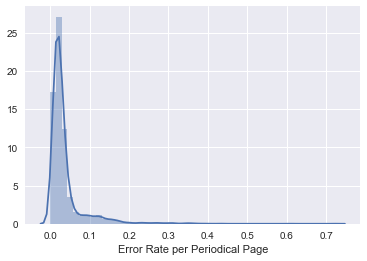

In [17]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('e', 15489),
 ('w', 12244),
 ('m', 9242),
 ('r', 8949),
 ('br', 8450),
 ('g', 7868),
 ('f', 7778),
 ('-', 6872),
 ('d', 6764),
 ("'", 3734),
 ('n', 3571),
 ('od', 3512),
 ('gc', 3058),
 ('k', 2712),
 ('wm', 2525),
 ('t', 2117),
 ('th', 1721),
 ("canvassers'", 1207),
 ('pg', 1115),
 ('bf', 910),
 ('co', 909),
 ('mt', 893),
 ('ck', 766),
 ('hm', 731),
 ('u', 578),
 ("sec'y-treas", 472),
 ('ords', 470),
 ('drury', 452),
 ('two-per-cent', 408),
 ('x', 403),
 ('suda', 358),
 ("elders'", 338),
 ('-gallon', 333),
 ('kimberlin', 264),
 ('plake', 241),
 ("colporteurs'", 238),
 ('mitzelfelt', 215),
 ('-gal', 207),
 ('secretary-treasurer', 204),
 ("'the", 204),
 ("soldiers'", 202),
 ('erald', 201),
 ('--', 199),
 ('devereaux', 196),
 ('seventhday', 172),
 ('ruh', 170),
 ('church-schools', 168),
 ('pengelly', 166),
 ('es', 160),
 ('five-gallon', 158)]

## Correction 3 -- Remove extra dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LUH19081104-V01-01-page1.txt: [('-', ''), ('HER-', 'HER')]
LUH19081104-V01-01-page3.txt: [('Sab-', 'Sab')]
LUH19081104-V01-01-page5.txt: [('-', ''), ('-', ''), ('-s.J.L', 's.J.L')]
LUH19081104-V01-01-page6.txt: [('-M', 'M')]
LUH19081104-V01-01-page7.txt: [('-Chem', 'Chem'), ('educa-', 'educa'), ('en-', 'en')]
LUH19081111-V01-02-page1.txt: [('bright-', 'bright')]
LUH19081111-V01-02-page2.txt: [('-', ''), ('-', '')]
LUH19081111-V01-02-page3.txt: [('.-', '.'), ('-', '')]
LUH19081111-V01-02-page4.txt: [('-', ''), ('-Be', 'Be'), ('fami-', 'fami')]
LUH19081111-V01-02-page5.txt: [('-preaches', 'preaches'), ('-', '')]
LUH19081111-V01-02-page7.txt: [('Gen-', 'Gen'), ('en-', 'en'), ('thinking-', 'thinking'), ('-', '')]
LUH19081119-V01-03-page2.txt: [('WORKERS.-', 'WORKERS.'), ('de-', 'de')]
LUH19081119-V01-03-page3.txt: [('-', '')]
LUH19081119-V01-03-page5.txt: [('-', ''), ('camp-', 'camp')]
LUH19081119-V01-03-page6.txt: [('-"', '"'), ('-.', '.')]
LUH19081119-V01-03-page7.txt: [('-work', 'work')

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LUH/correction3

Average verified rate: 0.969762184438248

Average of error rates: 0.033413153456998315

Total token count: 5745587



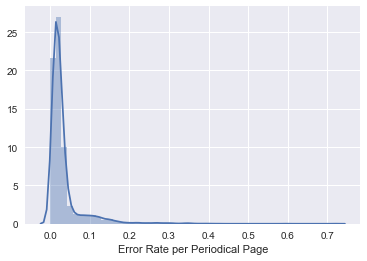

In [20]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('e', 15515),
 ('w', 12254),
 ('m', 9261),
 ('r', 8963),
 ('br', 8455),
 ('g', 7885),
 ('f', 7801),
 ('d', 6791),
 ("'", 3786),
 ('n', 3584),
 ('od', 3519),
 ('gc', 3060),
 ('k', 2721),
 ('wm', 2525),
 ('t', 2147),
 ('th', 1734),
 ("canvassers'", 1208),
 ('pg', 1116),
 ('co', 1026),
 ('bf', 911),
 ('mt', 893),
 ('ck', 767),
 ('hm', 731),
 ('u', 578),
 ('ords', 470),
 ('drury', 452),
 ('x', 423),
 ('suda', 358),
 ("elders'", 338),
 ('kimberlin', 264),
 ('lb', 244),
 ("sec'y-treas", 244),
 ('plake', 241),
 ("colporteurs'", 238),
 ('mitzelfelt', 215),
 ("'the", 206),
 ('two-per-cent', 203),
 ("soldiers'", 202),
 ('erald', 201),
 ('devereaux', 196),
 ('seventhday', 172),
 ('ruh', 170),
 ('pengelly', 166),
 ('es', 160),
 ('kittleson', 152),
 ('pp', 151),
 ('tatton', 149),
 ('palmiter', 148),
 ("'i", 148),
 ('mc', 148)]

## Correction 4 -- Remove extra quotation marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
        print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LUH19081104-V01-01-page1.txt: [("'Our", 'Our')]
LUH19081104-V01-01-page4.txt: [("'L.", 'L.')]
LUH19081111-V01-02-page3.txt: [("'Of", 'Of'), ("'and", 'and')]
LUH19081111-V01-02-page5.txt: [("'testimonies", 'testimonies'), ("'done", 'done')]
LUH19081111-V01-02-page7.txt: [("'Many", 'Many'), ("'of", 'of')]
LUH19081111-V01-02-page8.txt: [("'is", 'is')]
LUH19081119-V01-03-page2.txt: [("'with", 'with')]
LUH19081119-V01-03-page4.txt: [("'is", 'is')]
LUH19081119-V01-03-page5.txt: [("'America", 'America')]
LUH19081125-V01-04-page6.txt: [('\'"', '"')]
LUH19081125-V01-04-page7.txt: [("'Interest.", 'Interest.')]
LUH19081202-V01-05-page1.txt: [("'tis", 'tis')]
LUH19081202-V01-05-page2.txt: [("'People's", 'Peoples')]
LUH19081202-V01-05-page3.txt: [("'in", 'in')]
LUH19081202-V01-05-page6.txt: [("'two", 'two'), ("'nearly", 'nearly')]
LUH19081202-V01-05-page7.txt: [("'does", 'does'), ("'once.", 'once.'), ("'Roue", 'Roue')]
LUH19081202-V01-05-page8.txt: [("'They", 'They')]
LUH19081209-V01-06-page3.txt: 

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LUH/correction4

Average verified rate: 0.9705030998940217

Average of error rates: 0.032654637436762224

Total token count: 5745519



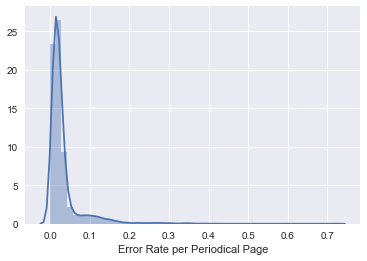

In [23]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('e', 15519),
 ('w', 12256),
 ('m', 9266),
 ('r', 8971),
 ('br', 8467),
 ('g', 7887),
 ('f', 7809),
 ('d', 6800),
 ("'", 3621),
 ('n', 3589),
 ('od', 3522),
 ('gc', 3062),
 ('k', 2722),
 ('wm', 2525),
 ('t', 2165),
 ('th', 1736),
 ("canvassers'", 1191),
 ('pg', 1116),
 ('co', 1026),
 ('bf', 911),
 ('mt', 895),
 ('ck', 768),
 ('hm', 732),
 ('u', 578),
 ('ords', 470),
 ('drury', 452),
 ('x', 423),
 ('suda', 358),
 ("elders'", 338),
 ('kimberlin', 264),
 ('lb', 244),
 ('plake', 241),
 ("sec'y-treas", 241),
 ("colporteurs'", 238),
 ('mitzelfelt', 215),
 ('two-per-cent', 203),
 ('erald', 201),
 ("soldiers'", 201),
 ('devereaux', 196),
 ('seventhday', 172),
 ('ruh', 170),
 ('pengelly', 166),
 ('es', 160),
 ('kittleson', 152),
 ('pp', 151),
 ('mc', 150),
 ('tatton', 149),
 ('palmiter', 148),
 ('herrington', 145),
 ('ch', 144)]

## Correction 5 -- Rejoin Burst Words

In [25]:
# %load shared_elements/rejoin_burst_words.py
prev = cycle
cycle = "correction5"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LUH19081104-V01-01-page5.txt: [('So', 'So')]
LUH19081125-V01-04-page7.txt: [('Is', 'Is')]
LUH19090922-V01-47-page8.txt: [('Of', 'Of')]
LUH19091013-V01-50-page1.txt: [(' S P R IN G S ', 'SPRINGS')]
LUH19100309-V02-10-page4.txt: [('If', 'If')]
LUH19100907-V02-36-page2.txt: [('He', 'He')]
LUH19101102-V02-44-page4.txt: [('To', 'To')]
LUH19101116-V02-46-page5.txt: [('To', 'To')]
LUH19101221-V02-51-page9.txt: [('If', 'If')]
LUH19110419-V03-16-page6.txt: [('It', 'It')]
LUH19110517-V03-20-page1.txt: [('It', 'It')]
LUH19110719-V03-29-page3.txt: [('We', 'We')]
LUH19110823-V03-34-page8.txt: [('On', 'On')]
LUH19110830-V03-35-page7.txt: [('St', 'St')]
LUH19110913-V03-37-page3.txt: [('La', 'La')]
LUH19111122-V03-47-page4.txt: [('He', 'He')]
LUH19120124-V04-04-page5.txt: [('St', 'St')]
LUH19120221-V04-08s-page1.txt: [('St', 'St')]
LUH19120501-V04-18-page16.txt: [('El', 'El')]
LUH19120626-V04-26-page4.txt: [('At', 'At')]
LUH19120710-V04-28-page6.txt: [('If', 'If'), ('We', 'We')]
LUH19120814-V04-33-pag

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LUH/correction5

Average verified rate: 0.9704898128895234

Average of error rates: 0.032669139966273186

Total token count: 5745643



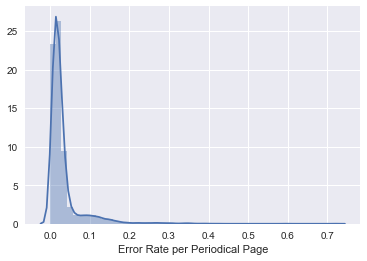

In [26]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('e', 15520),
 ('w', 12256),
 ('m', 9266),
 ('r', 8970),
 ('br', 8467),
 ('g', 7885),
 ('f', 7809),
 ('d', 6800),
 ("'", 3621),
 ('n', 3588),
 ('od', 3522),
 ('gc', 3062),
 ('k', 2722),
 ('wm', 2525),
 ('t', 2165),
 ('th', 1736),
 ("canvassers'", 1191),
 ('pg', 1116),
 ('co', 1026),
 ('bf', 911),
 ('mt', 895),
 ('ck', 768),
 ('hm', 732),
 ('u', 577),
 ('ords', 470),
 ('drury', 452),
 ('x', 423),
 ('suda', 358),
 ("elders'", 338),
 ('kimberlin', 264),
 ('lb', 244),
 ('plake', 241),
 ("sec'y-treas", 241),
 ("colporteurs'", 238),
 ('mitzelfelt', 215),
 ('two-per-cent', 203),
 ('erald', 201),
 ("soldiers'", 201),
 ('devereaux', 196),
 ('seventhday', 172),
 ('ruh', 170),
 ('pengelly', 166),
 ('es', 160),
 ('kittleson', 152),
 ('pp', 151),
 ('mc', 150),
 ('tatton', 149),
 ('palmiter', 148),
 ('ch', 144),
 ('herrington', 144)]

## Correction 6 -- Rejoin Split Words

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction5"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LUH19081104-V01-01-page3.txt: [('th', 'in')]
LUH19081104-V01-01-page6.txt: [('zo', 'o')]
LUH19081111-V01-02-page2.txt: [('re', 'conversion')]
LUH19081111-V01-02-page3.txt: [('donat', 'e')]
LUH19081111-V01-02-page4.txt: [('re', 'studying')]
LUH19081111-V01-02-page5.txt: [('mis', 'spent')]
LUH19081119-V01-03-page7.txt: [('Mi', 'ch')]
LUH19081125-V01-04-page1.txt: [('co', 'laborers')]
LUH19081125-V01-04-page4.txt: [('co', 'operation')]
LUH19081125-V01-04-page5.txt: [('oppo', 'rtunity')]
LUH19081125-V01-04-page7.txt: [('zo', 'o')]
LUH19081202-V01-05-page7.txt: [('mis', 'does')]
LUH19081209-V01-06-page5.txt: [('Re', 'X')]
LUH19081216-V01-07-page8.txt: [('SEV', 'ENTH-DAY')]
LUH19081223-V01-08-page3.txt: [('th', 'at')]
LUH19081223-V01-08-page4.txt: [('obe', 'dience')]
LUH19081223-V01-08-page6.txt: [('Novem', 'ber')]
LUH19081223-V01-08-page7.txt: [('co', 'operation')]
LUH19081223-V01-08-page8.txt: [('SEV', 'ENTH')]
LUH19081230-V01-09-page8.txt: [('SEV', 'ENTH-DAY')]
LUH19090106-V01-10-page3.tx

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LUH/correction5

Average verified rate: 0.9707086648165923

Average of error rates: 0.03244654300168634

Total token count: 5744634



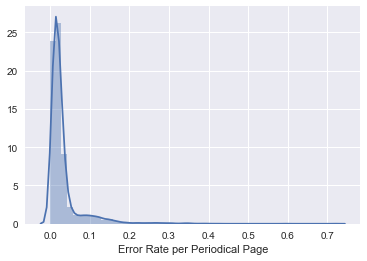

In [29]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('e', 15491),
 ('w', 12253),
 ('m', 9272),
 ('r', 8959),
 ('br', 8454),
 ('g', 7878),
 ('f', 7808),
 ('d', 6797),
 ("'", 3621),
 ('n', 3561),
 ('od', 3518),
 ('gc', 3062),
 ('k', 2720),
 ('wm', 2525),
 ('t', 2157),
 ('th', 1688),
 ("canvassers'", 1191),
 ('pg', 1116),
 ('bf', 911),
 ('co', 911),
 ('mt', 895),
 ('ck', 768),
 ('hm', 731),
 ('u', 576),
 ('ords', 470),
 ('drury', 452),
 ('x', 421),
 ('suda', 358),
 ("elders'", 338),
 ('kimberlin', 259),
 ('lb', 244),
 ('plake', 241),
 ("sec'y-treas", 241),
 ("colporteurs'", 238),
 ('mitzelfelt', 215),
 ('two-per-cent', 203),
 ('erald', 201),
 ("soldiers'", 201),
 ('devereaux', 196),
 ('seventhday', 172),
 ('ruh', 170),
 ('pengelly', 166),
 ('es', 158),
 ('kittleson', 152),
 ('pp', 151),
 ('tatton', 149),
 ('palmiter', 148),
 ('herrington', 144),
 ('ch', 143),
 ('rapson', 142)]

## Review Remaining Errors

In [31]:
reports.docs_with_high_error_rate(summary)

[('LUH19150602-V07-22-page1.txt', 0.72),
 ('LUH19160308-V08-10-page1.txt', 0.596),
 ('LUH19170704-V09-27-page7.txt', 0.425),
 ('LUH19140422-V06-16-page13.txt', 0.407),
 ('LUH19150721-V07-29-page7.txt', 0.392),
 ('LUH19200804-V12-31-page11.txt', 0.392),
 ('LUH19150623-V07-25-page7.txt', 0.383),
 ('LUH19140422-V06-16-page14.txt', 0.375),
 ('LUH19180724-V10-30-page11.txt', 0.364),
 ('LUH19170627-V09-26-page7.txt', 0.356),
 ('LUH19180717-V10-29-page7.txt', 0.352),
 ('LUH19190730-V11-31-page11.txt', 0.35),
 ('LUH19160712-V08-28-page4.txt', 0.35),
 ('LUH19180731-V10-31-page7.txt', 0.348),
 ('LUH19200714-V12-28-page7.txt', 0.347),
 ('LUH19150804-V07-31-page7.txt', 0.346),
 ('LUH19150630-V07-26-page7.txt', 0.342),
 ('LUH19160809-V08-32-page8.txt', 0.339),
 ('LUH19160621-V08-25-page7.txt', 0.338),
 ('LUH19170718-V09-29-page11.txt', 0.333),
 ('LUH19160802-V08-31-page16.txt', 0.332),
 ('LUH19150825-V07-34-page7.txt', 0.33),
 ('LUH19190618-V11-25-page11.txt', 0.317),
 ('LUH19170620-V09-25-page7.tx

In [32]:
# %load shared_elements/high_error_rates.py
doc_keys = [x[0] for x in reports.docs_with_high_error_rate(summary) if x[1] > 0.35]

# utilities.open_original_docs(doc_keys, directories['cycle'])

## Correction 7 -- Separate Squashed Words

In [33]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction7"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = utilities.readfile(directories['prev'], filename)
    clean.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = utilities.strip_punct(content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = clean.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if clean.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LUH19081111-V01-02-page7.txt: [('Thanksgivingingathering', 'Thanksgiving ingathering')]
LUH19090310-V01-19-page7.txt: [('understandstanding', 'understand standing')]
LUH19090421-V01-25-page1.txt: [('wonderfurrevelations', 'wonder fur revelations')]
LUH19091006-V01-49-page1.txt: [('EducationalSecretary', 'Educational Secretary')]
LUH19100112-V02-02-page6.txt: [('hastakenfromusthechancetotrainouryoung', 'has taken from us the chance to train our young')]
LUH19100126-V02-04-page3.txt: [('nineteentwentieths', 'nineteen twentieth s')]
LUH19100713-V02-28-page7.txt: [('successsellingProtestant', 'success selling Protestant')]
LUH19100831-V02-35-page7.txt: [('underconvictionfor', 'under conviction for')]
LUH19110524-V03-21-page1.txt: [('advancedarithmetic', 'advanced arithmetic')]
LUH19110927-V03-39-page1.txt: [('IllinoisConference', 'Illinois Conference')]
LUH19110927-V03-39-page2.txt: [('furtheradvancement', 'further advancement')]
LUH19110927-V03-39-page6.txt: [('secretarytreasurer', 'secre

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LUH/correction7

Average verified rate: 0.9707094937613351

Average of error rates: 0.032445362563237774

Total token count: 5744899



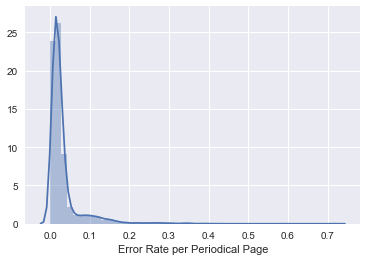

In [34]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [35]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('e', 15503),
 ('w', 12253),
 ('m', 9280),
 ('r', 8965),
 ('br', 8454),
 ('g', 7878),
 ('f', 7811),
 ('d', 6797),
 ("'", 3621),
 ('n', 3569),
 ('od', 3518),
 ('gc', 3062),
 ('k', 2721),
 ('wm', 2525),
 ('t', 2162),
 ('th', 1688),
 ("canvassers'", 1191),
 ('pg', 1116),
 ('bf', 911),
 ('co', 911),
 ('mt', 895),
 ('ck', 768),
 ('hm', 731),
 ('u', 582),
 ('ords', 470),
 ('drury', 452),
 ('x', 421),
 ('suda', 358),
 ("elders'", 338),
 ('kimberlin', 259),
 ('lb', 244),
 ('plake', 241),
 ("sec'y-treas", 241),
 ("colporteurs'", 238),
 ('mitzelfelt', 215),
 ('two-per-cent', 203),
 ('erald', 201),
 ("soldiers'", 201),
 ('devereaux', 196),
 ('seventhday', 172),
 ('ruh', 170),
 ('pengelly', 166),
 ('es', 158),
 ('kittleson', 152),
 ('pp', 151),
 ('tatton', 149),
 ('palmiter', 148),
 ('herrington', 144),
 ('ch', 143),
 ('rapson', 142)]